In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Heatmap of crick proportion

In [3]:
name = "NanoStrand-seq"
chroms = ["chr%d" % c for c in range(1, 23)] + ["chrX", "chrY"]
dat = pd.read_csv("results/%s.qc_pass.csv" % name)
dat = dat.sort_values(by="Background").head(50)

In [4]:
rows = []
for cell in dat["Cell"]:
    path = "../../1_NanoStrandSeq/results/counts/stat_bin_reads/%s/%s.tsv" % (cell.split(".")[0], cell)
    df = pd.read_csv(path, sep="\t")
    row = []
    for chrom in chroms:
        df1 = df[df["Chrom"] == chrom]
        c1, c2 = df1["Crick"].sum(), df1["Watson"].sum()
        p = np.divide(c1, (c1 + c2))
        row.append(p)
    rows.append(row)
d = pd.DataFrame(rows, index=dat["Cell"], columns=chroms)

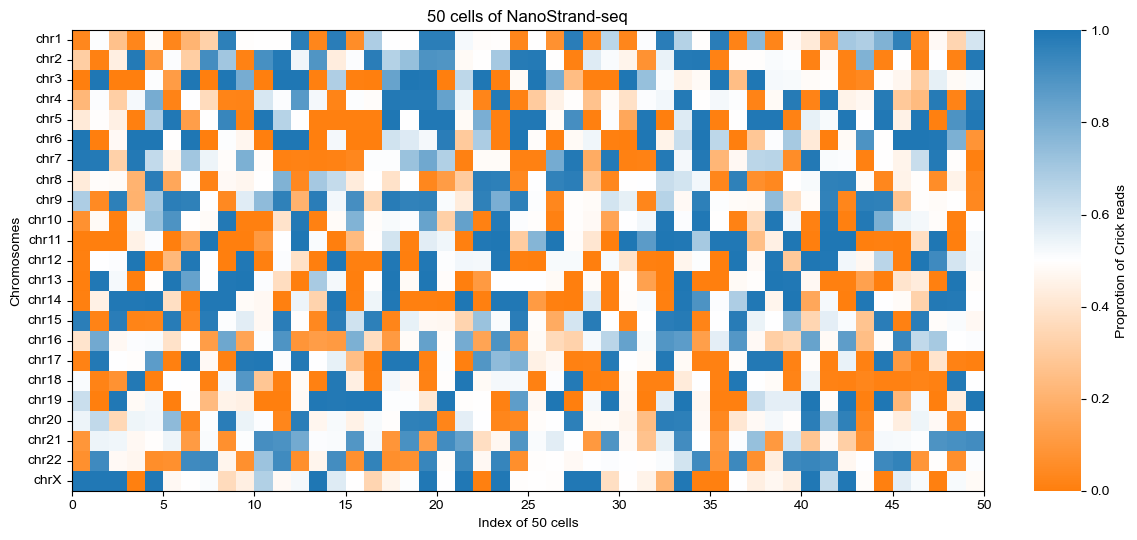

In [5]:
d = d[list(filter(lambda item: item != "chrY", d.columns))]
cmap = LinearSegmentedColormap.from_list('chaos', ["C1", "white", "C0"])

plt.figure(figsize=(11.5, 5.5))
plt.title("%d cells of %s" % (len(d), name))
sns.heatmap(d.T, cmap=cmap, vmin=0, vmax=1,
            cbar_kws={"label": "Proprotion of Crick reads", "fraction": 0.05, "aspect": 10, "panchor": (1, 1)})
xs = np.arange(0, 50 + 1, 5)
plt.xticks(xs, xs, rotation=0)
plt.gca().spines["top"].set_visible(True)
plt.gca().spines["bottom"].set_visible(True)
plt.gca().spines["left"].set_visible(True)
plt.gca().spines["right"].set_visible(True)
plt.xlabel("Index of 50 cells")
plt.ylabel("Chromosomes")
plt.tight_layout()
plt.savefig("figures/heatmap_of_crick_proportion.%s.pdf" % name, dpi=300)